# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Maulida Nabya Islami
- Email: maulidanabya@outlook.com
- Id Dicoding: maulida_nabya_islami

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Menyiapkan data yang akan diguankan

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv"

df = pd.read_csv(
    url,
    encoding='windows-1252',
    sep=';'
)

df.head()

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [3]:
df.isna().sum()

,0
ï»¿Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿Marital_status                             4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
df.describe()

,ï»¿Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
df['Curricular_units_1st_sem_grade'] = df['Curricular_units_1st_sem_grade'].astype(int)
df['Curricular_units_2nd_sem_grade'] = df['Curricular_units_2nd_sem_grade'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ï»¿Marital_status                             4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [9]:
df.columns = df.columns.str.replace('ï»¿', '')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

## Data Cleaning

In [11]:
marital_status_mapping = {
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Facto Union',
    6: 'Legally Separated'
}

# Ubah nilai tanpa mengubah ke category (tetap object/string)
df['Marital_status'] = df['Marital_status'].map(marital_status_mapping).astype(object)


In [12]:
binary_columns = [
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'International'
]

for col in binary_columns:
    df[col] = df[col].map({1: 'Yes', 0: 'No'}).astype(object)

In [13]:
df['Gender'] = df['Gender'].map({1: 'Male', 0: 'Female'}).astype(object)

In [14]:
new_df = df.copy()
columns_to_drop = [
    'Daytime_evening_attendance',
    'Previous_qualification',
    'Previous_qualification_grade',
    'Course',
    'Application_mode',
    'Application_order',
    'Nacionality',
    'Mothers_qualification',
    'Fathers_qualification',
    'Mothers_occupation',
    'Fathers_occupation',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

new_df.drop(columns=columns_to_drop, inplace=True)

In [15]:
new_df.describe()

,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.00000,4424.000000
mean,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.297920,0.137658,0.541817,6.232143,8.063291,4.435805,9.90868,0.150316
std,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.698924,0.690880,1.918546,2.195951,3.947951,3.014764,5.05442,0.753774
min,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.00000,0.000000
50%,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.00000,0.000000
75%,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.00000,0.000000
max,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.000000,12.000000,19.000000,23.000000,33.000000,20.000000,18.00000,12.000000


In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Admission_grade                               4424 non-null   float64
 2   Displaced                                     4424 non-null   object 
 3   Educational_special_needs                     4424 non-null   object 
 4   Debtor                                        4424 non-null   object 
 5   Tuition_fees_up_to_date                       4424 non-null   object 
 6   Gender                                        4424 non-null   object 
 7   Scholarship_holder                            4424 non-null   object 
 8   Age_at_enrollment                             4424 non-null   int64  
 9   International                                 4424 non-null   o

In [17]:
numerical_columns = [
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations'
]

new_df[numerical_columns].describe()

,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.00000,4424.000000
mean,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.297920,0.137658,0.541817,6.232143,8.063291,4.435805,9.90868,0.150316
std,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.698924,0.690880,1.918546,2.195951,3.947951,3.014764,5.05442,0.753774
min,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.00000,0.000000
50%,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.00000,0.000000
75%,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.00000,0.000000
max,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.000000,12.000000,19.000000,23.000000,33.000000,20.000000,18.00000,12.000000


In [18]:
new_df[numerical_columns].isnull().sum()

,0
Admission_grade,0
Age_at_enrollment,0
Curricular_units_1st_sem_credited,0
Curricular_units_1st_sem_enrolled,0
Curricular_units_1st_sem_evaluations,0
Curricular_units_1st_sem_approved,0
Curricular_units_1st_sem_grade,0
Curricular_units_1st_sem_without_evaluations,0
Curricular_units_2nd_sem_credited,0
Curricular_units_2nd_sem_enrolled,0


In [19]:
categorical_columns = [
    'Marital_status',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    'Status'
]

for col in categorical_columns:
    print(new_df[col].value_counts())

Marital_status
Single               3919
Married               379
Divorced               91
Facto Union            25
Legally Separated       6
Widower                 4
Name: count, dtype: int64
Displaced
Yes    2426
No     1998
Name: count, dtype: int64
Educational_special_needs
No     4373
Yes      51
Name: count, dtype: int64
Debtor
No     3921
Yes     503
Name: count, dtype: int64
Tuition_fees_up_to_date
Yes    3896
No      528
Name: count, dtype: int64
Gender
Female    2868
Male      1556
Name: count, dtype: int64
Scholarship_holder
No     3325
Yes    1099
Name: count, dtype: int64
International
No     4314
Yes     110
Name: count, dtype: int64
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [20]:
new_df[categorical_columns].isna().sum()

,0
Marital_status,0
Displaced,0
Educational_special_needs,0
Debtor,0
Tuition_fees_up_to_date,0
Gender,0
Scholarship_holder,0
International,0
Status,0


## Exploratory Data Analysis

In [21]:
cleaned_df = new_df.copy()
cleaned_df.describe(include="all")

,Marital_status,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,4424,4424.000000,4424,4424,4424,4424,4424,4424,4424.000000,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.00000,4424.000000,4424
unique,6,NaN,2,2,2,2,2,2,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Single,NaN,Yes,No,No,Yes,Female,No,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919,NaN,2426,4373,3921,3896,2868,3325,NaN,4314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,126.978119,NaN,NaN,NaN,NaN,NaN,NaN,23.265145,NaN,...,4.706600,10.297920,0.137658,0.541817,6.232143,8.063291,4.435805,9.90868,0.150316,NaN
std,NaN,14.482001,NaN,NaN,NaN,NaN,NaN,NaN,7.587816,NaN,...,3.094238,4.698924,0.690880,1.918546,2.195951,3.947951,3.014764,5.05442,0.753774,NaN
min,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN
25%,NaN,117.900000,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,...,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.00000,0.000000,NaN
50%,NaN,126.100000,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,...,5.000000,12.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.00000,0.000000,NaN
75%,NaN,134.800000,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,...,6.000000,13.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.00000,0.000000,NaN


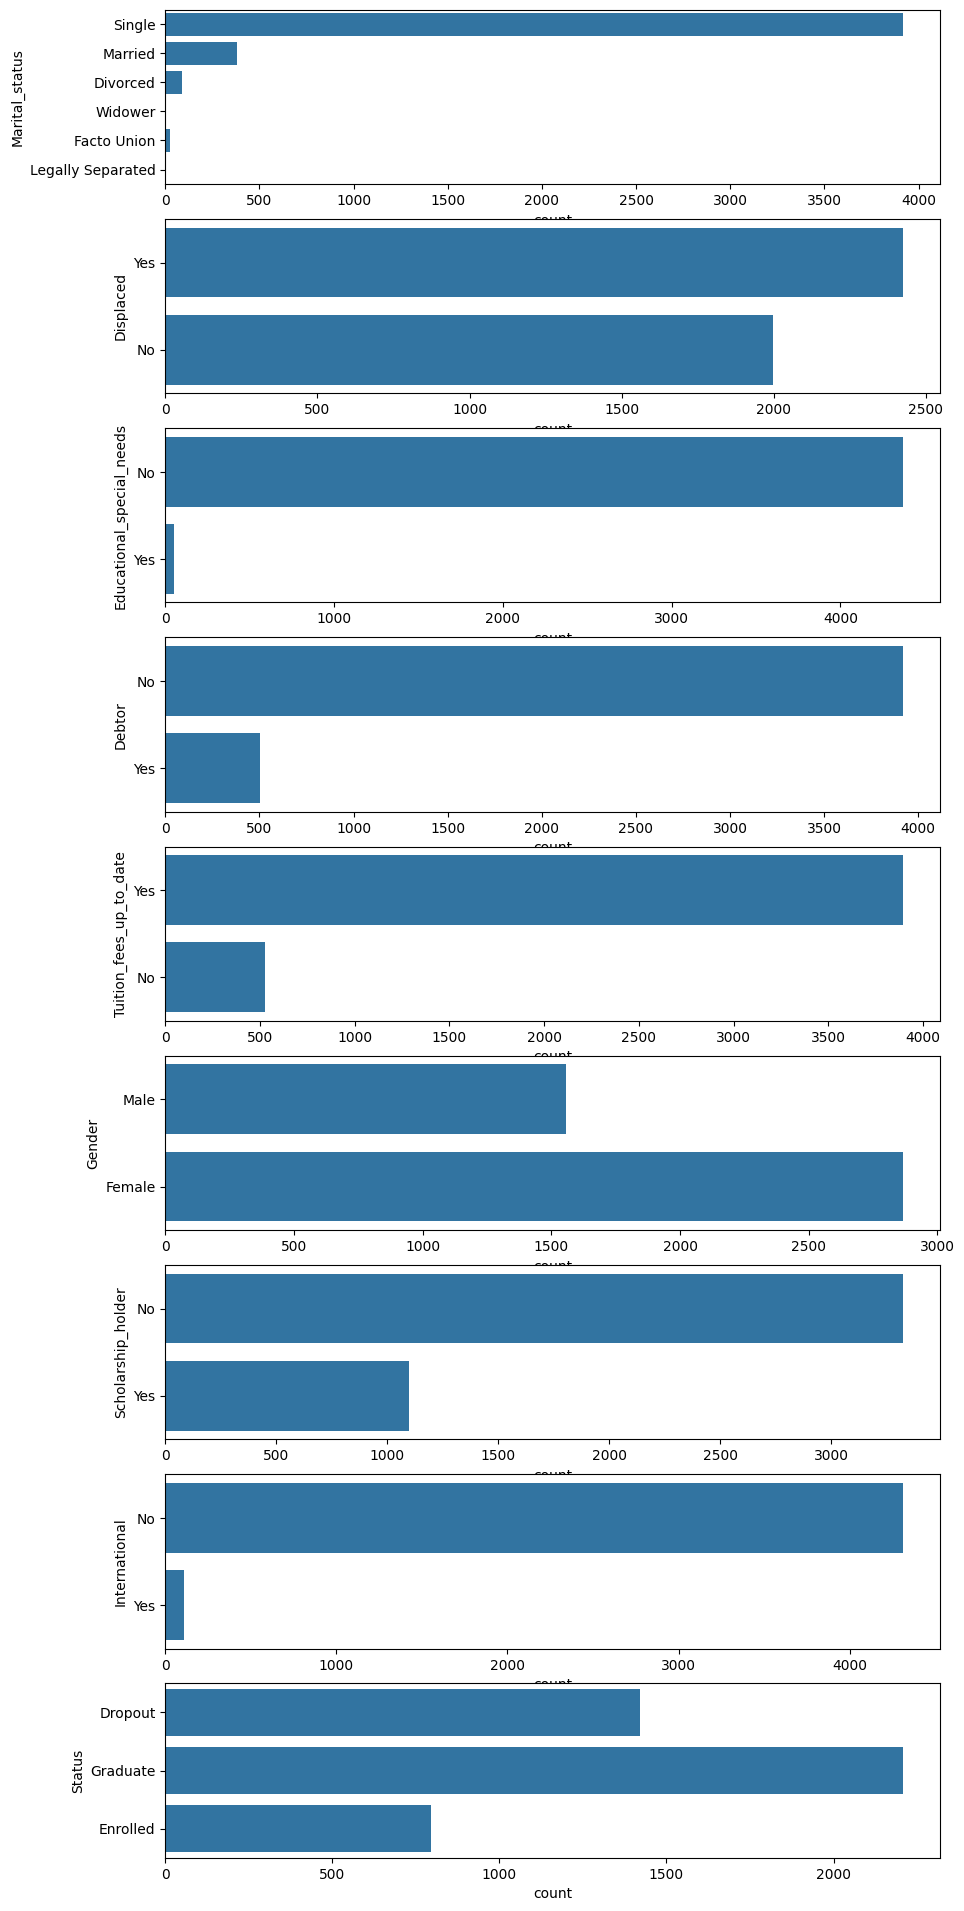

In [22]:
fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(10,24))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=cleaned_df, y=feature, ax=ax[i])
plt.show()

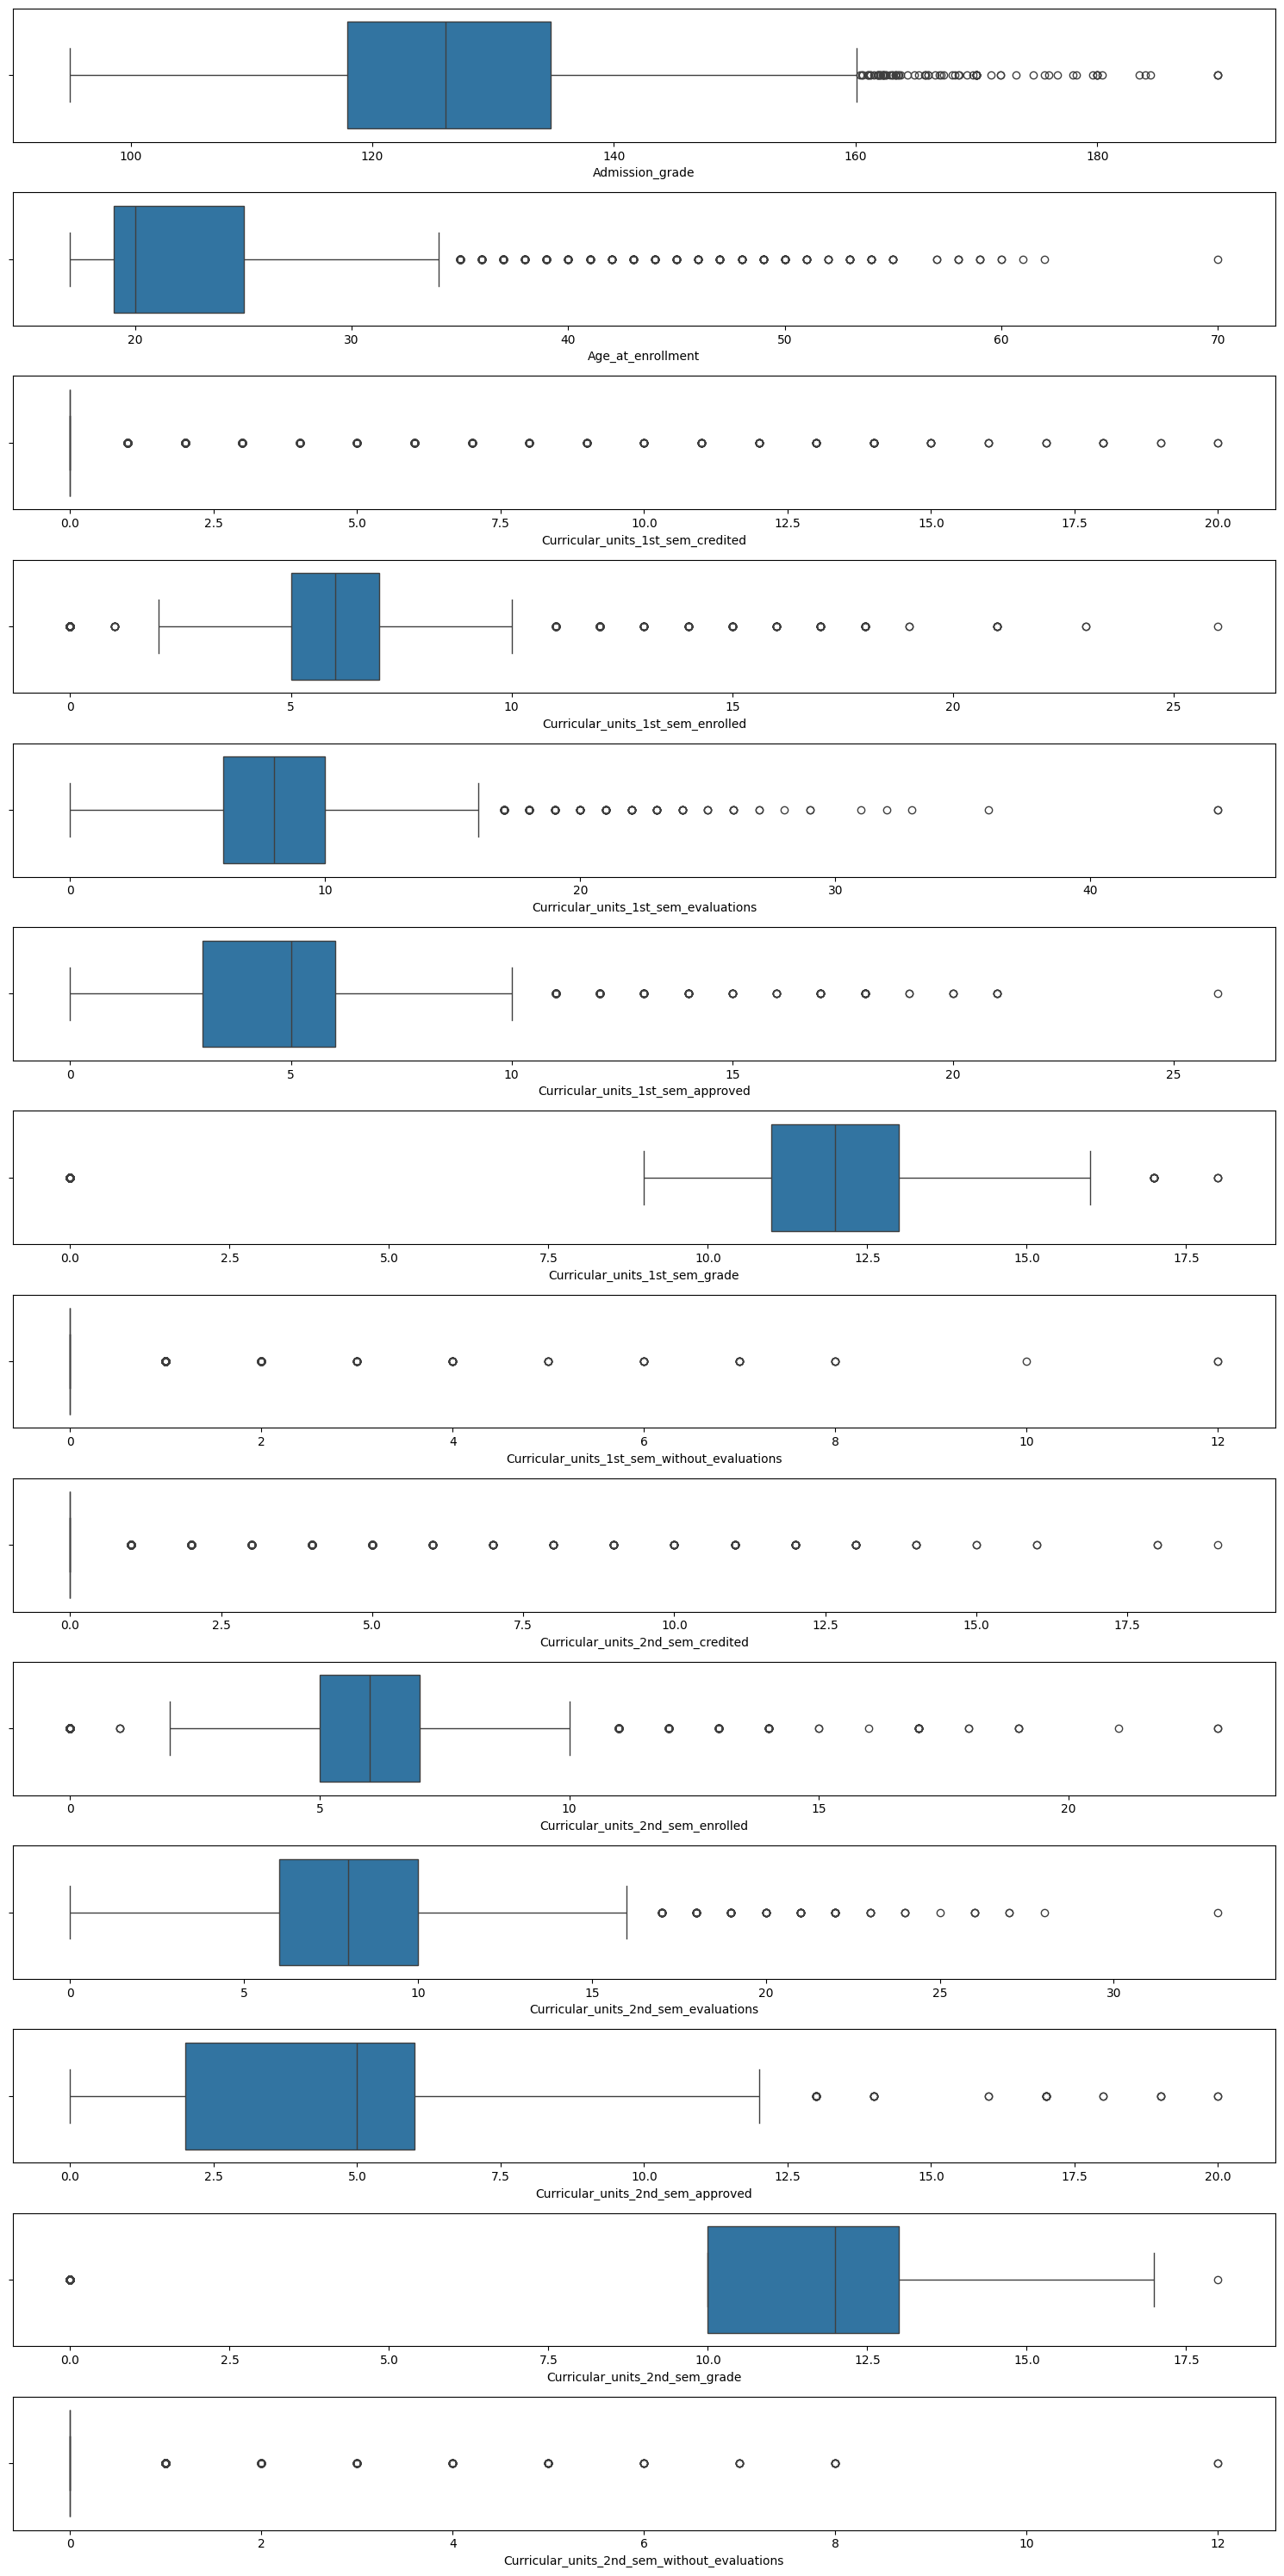

In [23]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df
)

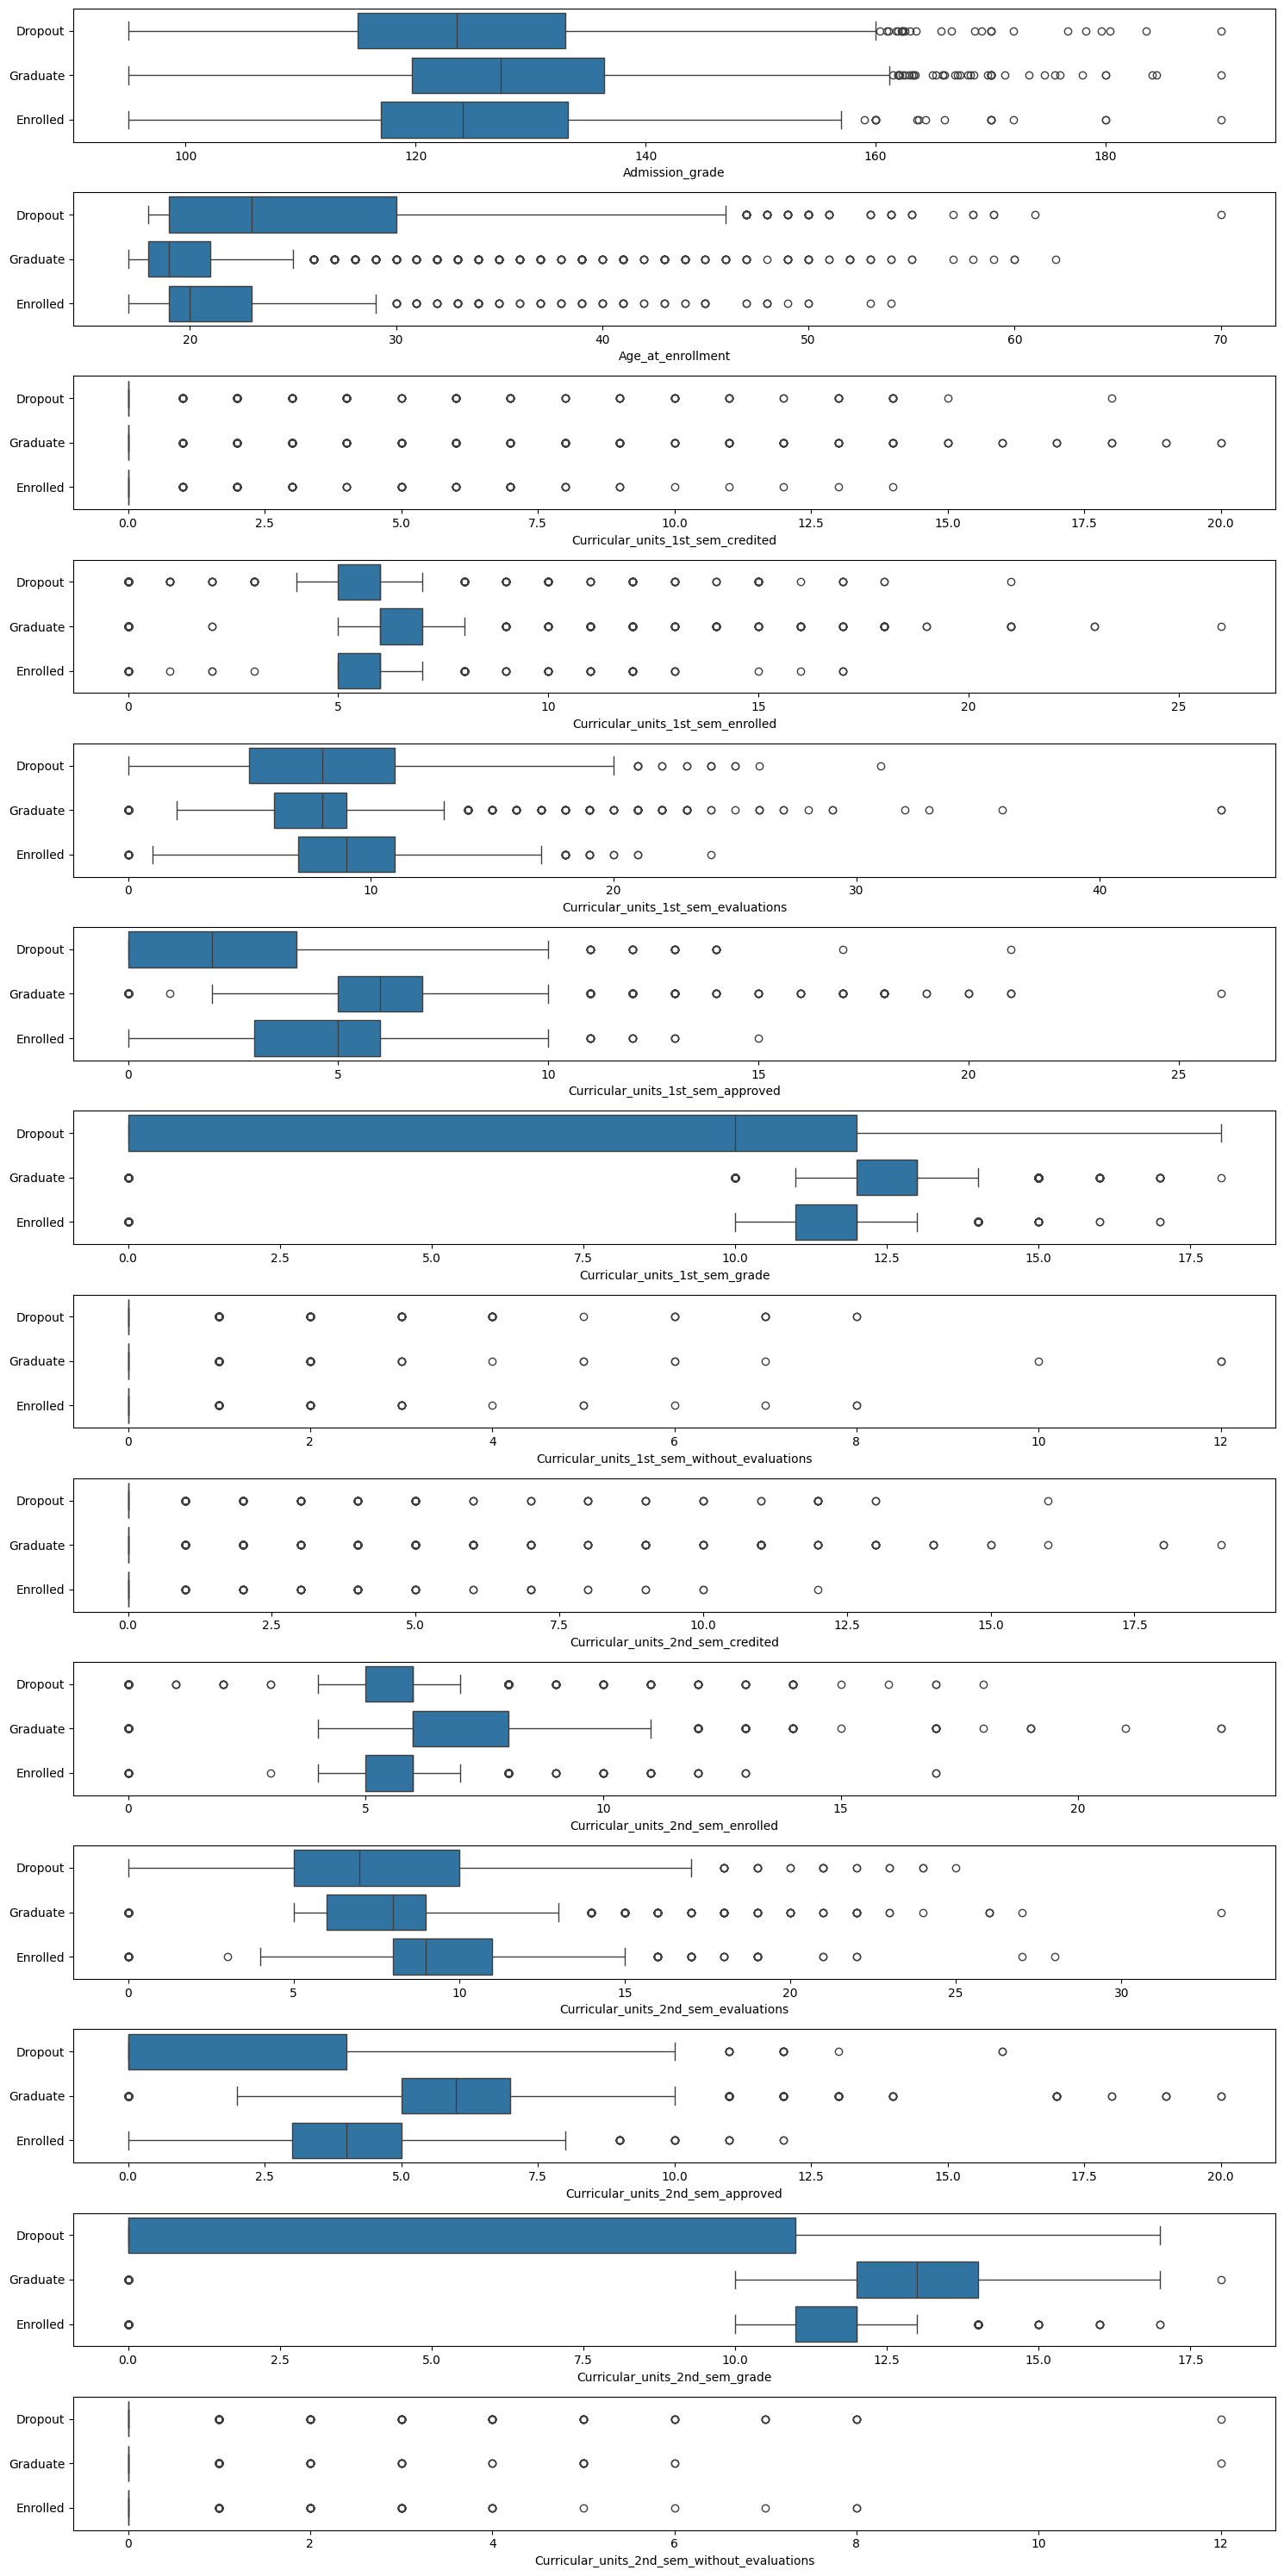

In [24]:
numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df,
    segment_feature="Status"
)

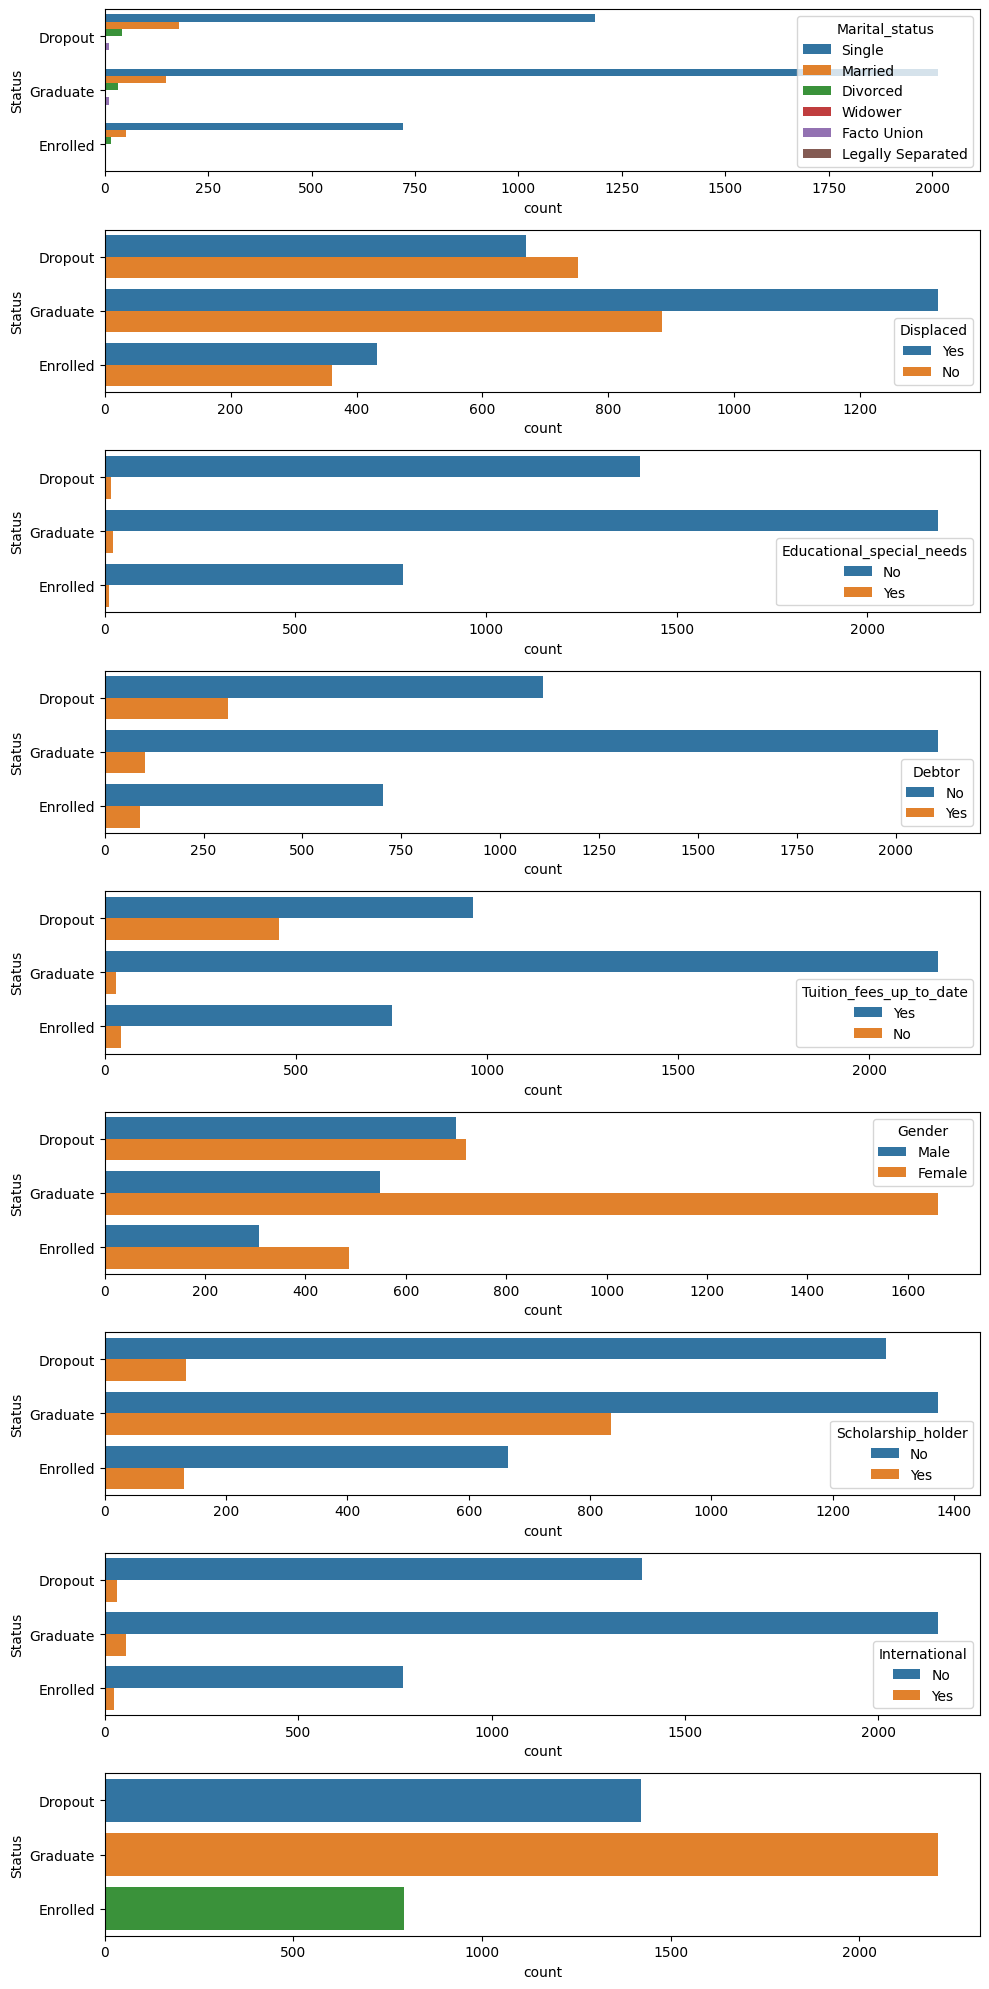

In [25]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=categorical_columns,
    df=cleaned_df,
    segment_feature="Status"
)

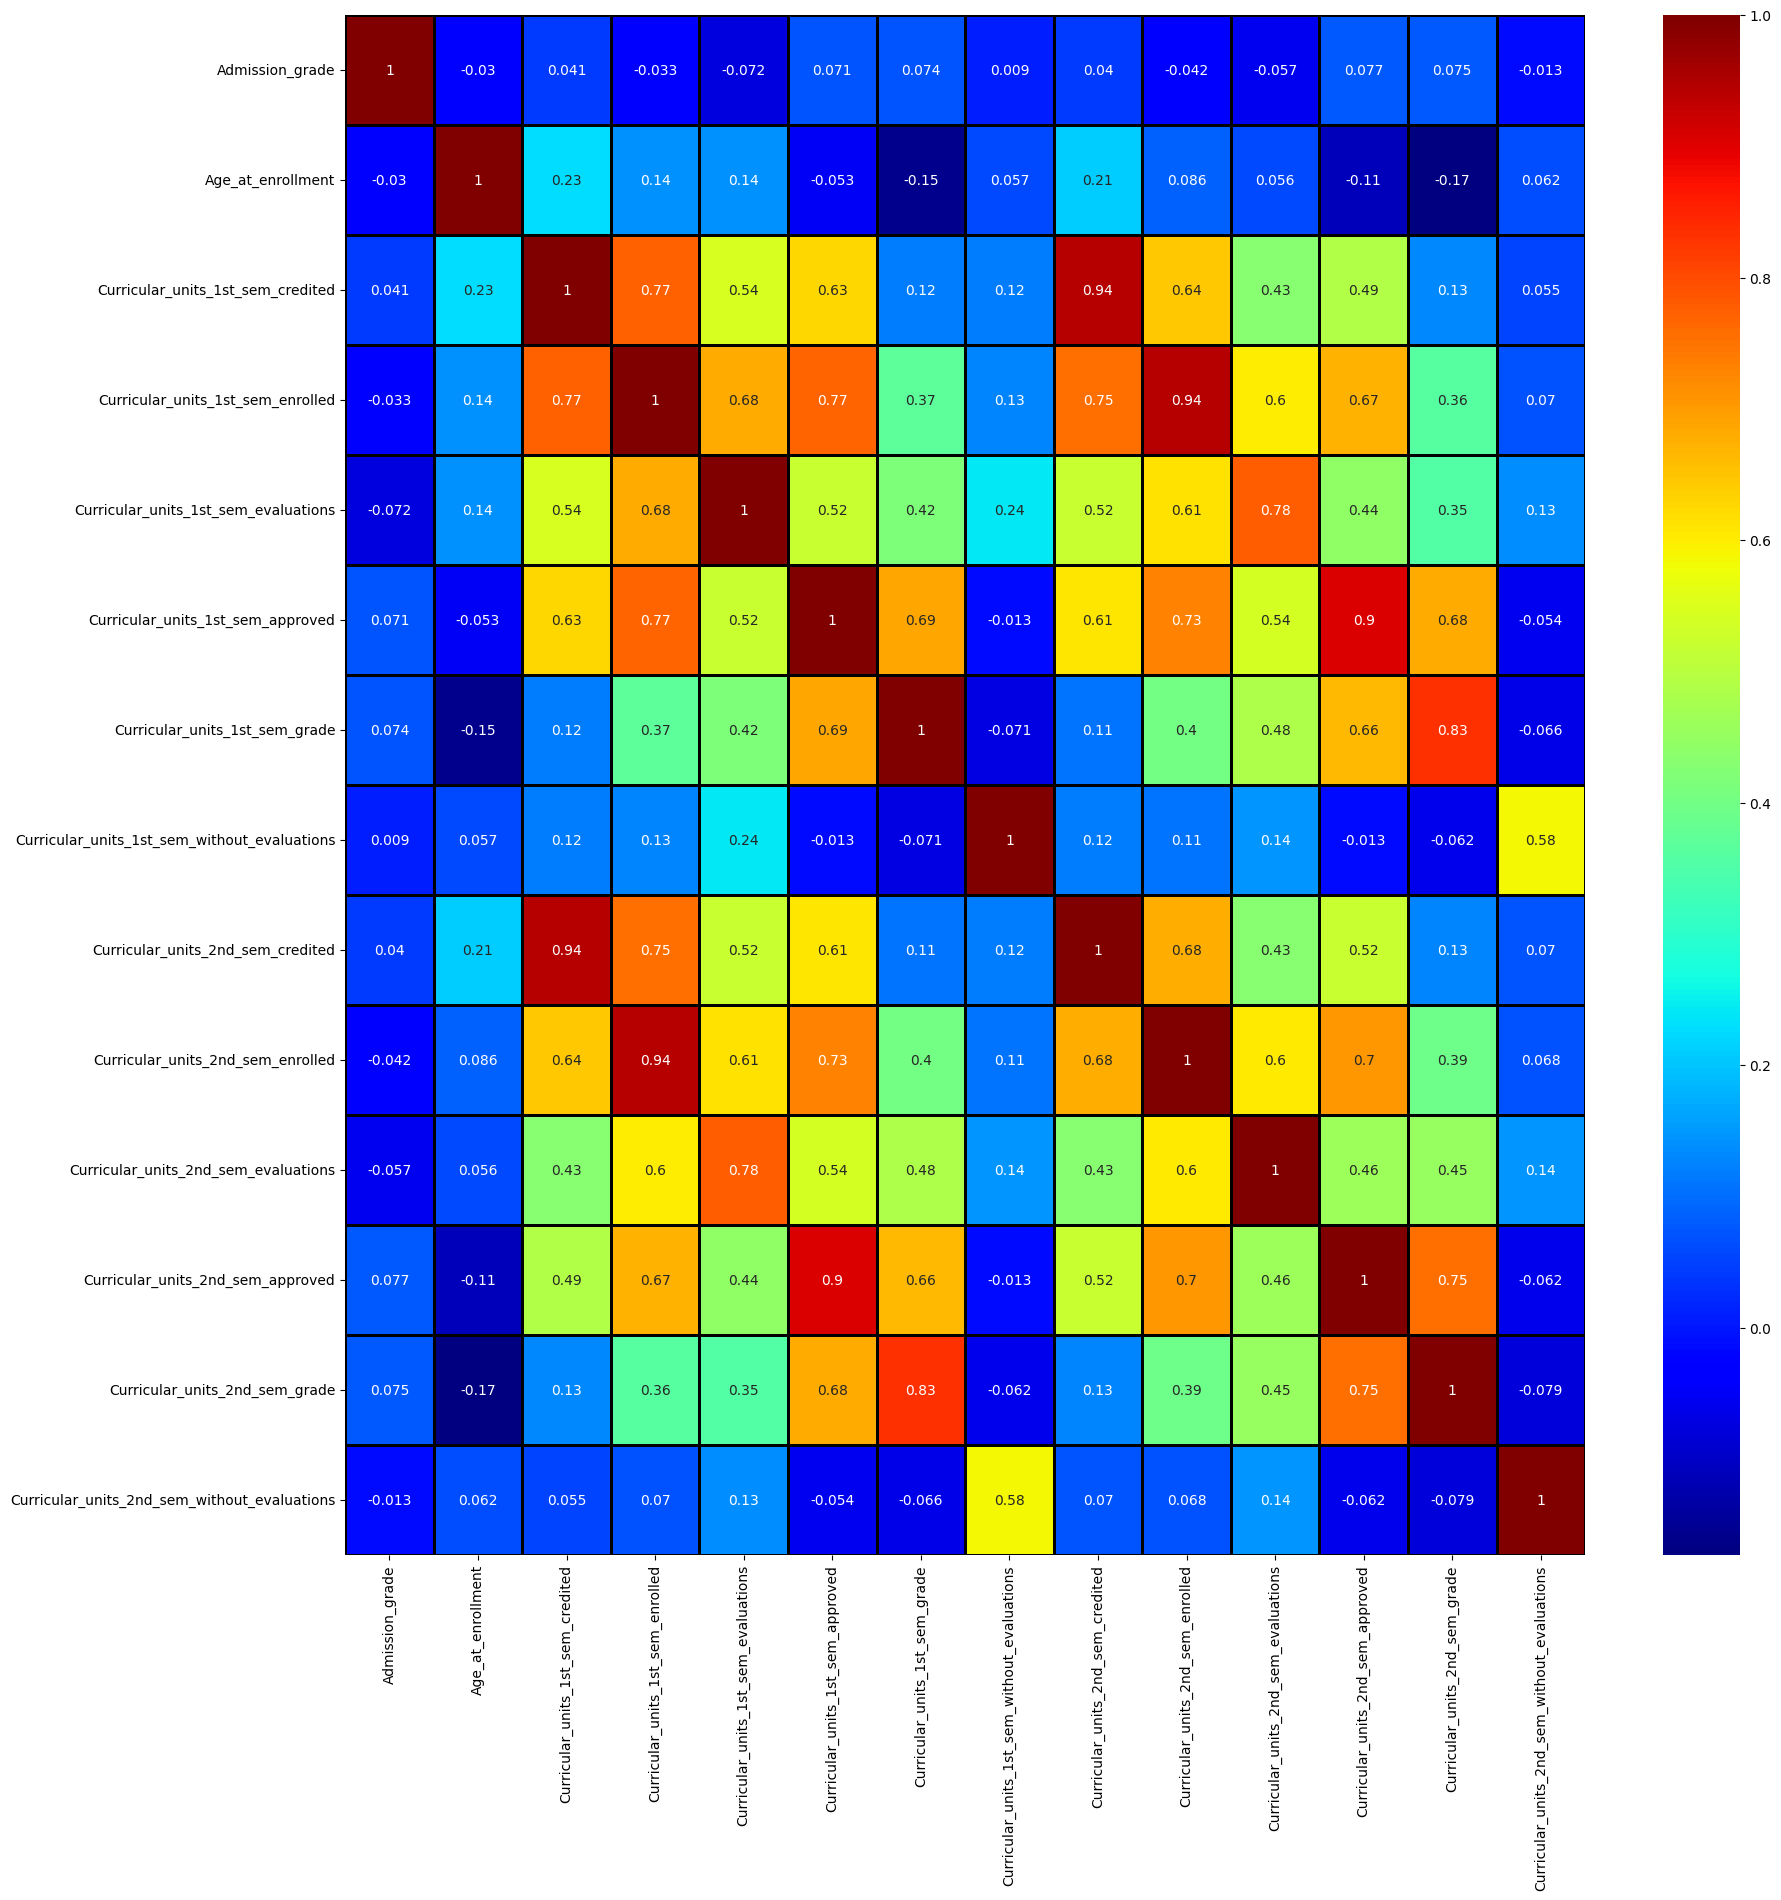

In [26]:
# melihat korelasi antar feature numerik
plt.figure(figsize=(20,20))
sns.heatmap(new_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

In [27]:
from sqlalchemy import create_engine

supabase_username = "postgres.osjxyykpsrrprswfkilr"
supabase_password = "nabya123456"
supabase_host = "aws-0-us-east-2.pooler.supabase.com"
supabase_port = 5432
supabase_database = "postgres"

URL = f"postgresql://{supabase_username}:{supabase_password}@{supabase_host}:{supabase_port}/{supabase_database}"

engine = create_engine(URL)
df.to_sql('students', engine, if_exists='replace')

df = pd.read_sql_table(table_name="students", con=engine.connect())
df.head(5)

,index,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,0,Single,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0,0,10.8,1.4,1.74,Dropout
1,1,Single,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate
2,2,Single,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0,0,10.8,1.4,1.74,Dropout
3,3,Single,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12,0,9.4,-0.8,-3.12,Graduate
4,4,Married,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13,0,13.9,-0.3,0.79,Graduate


## Data Preparation / Preprocessing

### Split data

In [28]:
train_df, test_df = train_test_split(new_df, test_size=0.2, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3539, 23)
(885, 23)


### Undersampling

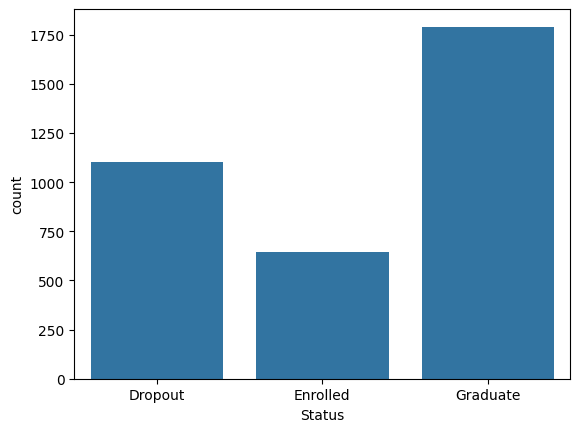

In [29]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [30]:
train_df.Status.value_counts()

,count
Status,
Graduate,1791
Dropout,1105
Enrolled,643


In [31]:
df_majority_1 = train_df[(train_df.Status == "Graduate")]
df_majority_2 = train_df[(train_df.Status == "Dropout")]
df_minority = train_df[(train_df.Status == "Enrolled")]

In [32]:
df_majority_1_undersampled = resample(df_majority_1, n_samples=643, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=643, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(643, 23)
(643, 23)


In [33]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Marital_status,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,...,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
271,Single,125.4,Yes,No,No,Yes,Male,No,19,No,...,3,13,0,0,5,5,1,11,0,Dropout
63,Single,123.8,No,No,No,Yes,Female,Yes,19,No,...,5,12,0,0,5,8,3,11,0,Enrolled
188,Single,113.3,Yes,No,No,Yes,Female,No,18,No,...,4,14,0,0,5,8,5,12,0,Enrolled
730,Single,120.0,No,No,No,Yes,Female,No,32,No,...,4,11,2,3,9,13,3,11,2,Dropout
1178,Single,125.0,No,No,No,Yes,Male,No,24,No,...,0,0,3,0,6,6,0,0,0,Dropout


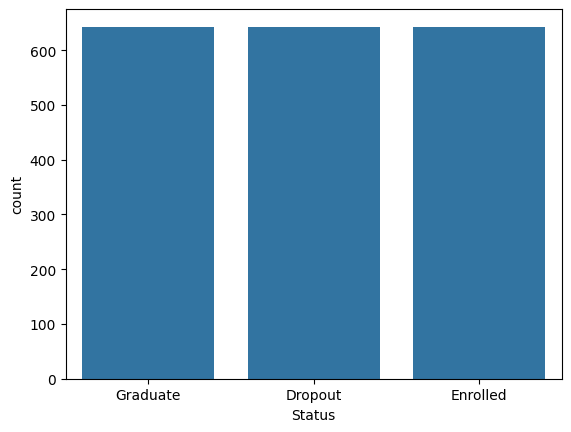

In [34]:
sns.countplot(data=undersampled_train_df, x="Status")
plt.show()

### Encoding & Scaling

In [35]:
X_train = undersampled_train_df.drop(columns="Status", axis=1)
y_train = undersampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

In [36]:
# Before calling scaling() and encoding(), create the 'model' directory if it doesn't exist
os.makedirs("model", exist_ok=True)

In [37]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            # Fit on the combined unique values from both train and test data
            combined_data = pd.concat([df[feature], df_test[feature]], ignore_index=True)
            encoder.fit(combined_data.astype(str))
            df["{}".format(feature)] = encoder.transform(df[feature].astype(str))
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature].astype(str))
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature].astype(str))
            df["{}".format(feature)] = encoder.transform(df[feature].astype(str))
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [38]:
categorical_columns = [
    'Marital_status',
    'Displaced',
    'Educational_special_needs',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Gender',
    'Scholarship_holder',
    'International',
    # 'Status'  # Remove 'Status' from the list as it's the target variable
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [39]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

### Principal Component Analysis (PCA)

In [40]:
# dataframe baru untuk menampung hasil PCA
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

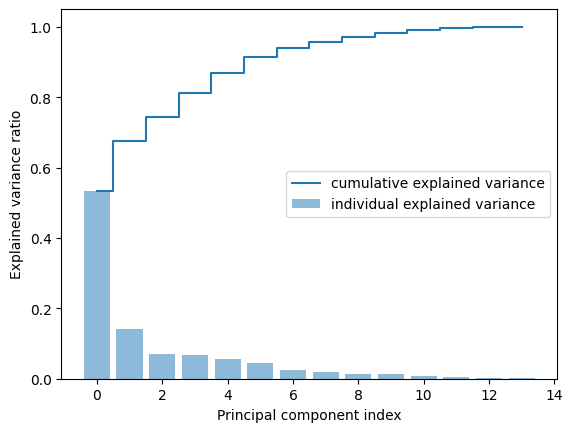

In [41]:
# Mencari jumlah komponen
pca = PCA(n_components=len(numerical_columns), random_state=123)
pca.fit(train_pca_df[numerical_columns])
princ_comp = pca.transform(train_pca_df[numerical_columns])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(numerical_columns)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(numerical_columns)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [42]:
pca = PCA(n_components=5, random_state=123)
pca.fit(train_pca_df[numerical_columns])
joblib.dump(pca, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca.transform(train_pca_df[numerical_columns])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=numerical_columns, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,4,1,0,0,1,1,1,0,-0.993944,-0.198999,0.365414,0.016024,0.110101
1,3,0,0,0,1,1,0,0,0.127734,0.092430,0.103834,0.353085,0.253895
2,3,0,0,0,1,1,1,0,0.156689,0.068536,-0.052163,0.393397,-0.019395
3,4,0,0,0,1,1,1,0,0.276884,-0.209550,0.048643,-0.044157,-0.127618
4,4,0,0,0,1,0,0,0,0.101300,-0.128401,0.001305,-0.051901,-0.031907


In [43]:
test_princ_comp_1 = pca.transform(test_pca_df[numerical_columns])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=numerical_columns, axis=1, inplace=True)

test_pca_df.head()

,Marital_status,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,International,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0,1,0,0,1,0,1,0,-0.376630,0.219116,-0.259053,-0.075207,-0.100374
1,4,0,0,0,1,0,0,0,0.159734,-0.113767,-0.003704,-0.106533,-0.085829
2,4,0,0,1,1,0,1,0,0.236953,-0.108720,0.112374,-0.081095,-0.086313
3,4,1,0,0,1,1,0,0,0.247524,-0.152475,-0.064589,-0.061565,-0.095118
4,4,1,0,0,1,0,0,0,-0.694809,0.414125,-0.305532,-0.207974,0.092004


## Modeling

### GridSearchCV

In [44]:
param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

### Decision Tree

In [45]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [46]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [47]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

### Random Forest

In [48]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [49]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [50]:
# melatih model
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=200,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

### Gradient Boosting

In [51]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [52]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [53]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=200
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

## Evaluation

In [54]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Dropout', 'Enrolled', 'Graduate']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

### Decision Tree

In [55]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.86      0.56      0.68       316
    Enrolled       0.28      0.61      0.38       151
    Graduate       0.77      0.65      0.70       418

    accuracy                           0.61       885
   macro avg       0.64      0.61      0.59       885
weighted avg       0.72      0.61      0.64       885



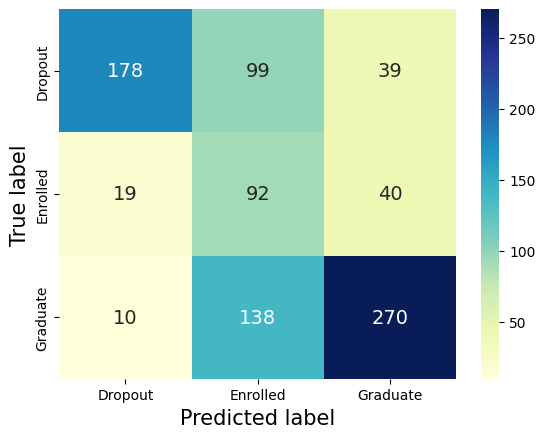

,Dropout,Enrolled,Graduate
Dropout,178,99,39
Enrolled,19,92,40
Graduate,10,138,270


In [56]:
evaluating(y_pred=y_pred_test, y_true=y_test)

### Random Forest

              precision    recall  f1-score   support

     Dropout       0.87      0.64      0.73       316
    Enrolled       0.35      0.62      0.44       151
    Graduate       0.81      0.75      0.78       418

    accuracy                           0.69       885
   macro avg       0.68      0.67      0.65       885
weighted avg       0.75      0.69      0.71       885



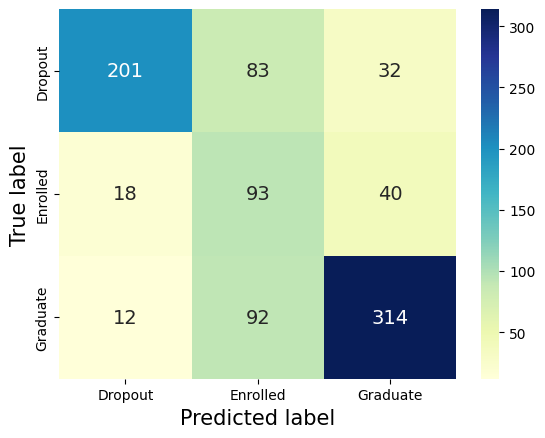

,Dropout,Enrolled,Graduate
Dropout,201,83,32
Enrolled,18,93,40
Graduate,12,92,314


In [57]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

### Gradient Boost

              precision    recall  f1-score   support

     Dropout       0.85      0.64      0.73       316
    Enrolled       0.34      0.64      0.45       151
    Graduate       0.82      0.72      0.77       418

    accuracy                           0.68       885
   macro avg       0.67      0.67      0.65       885
weighted avg       0.75      0.68      0.70       885



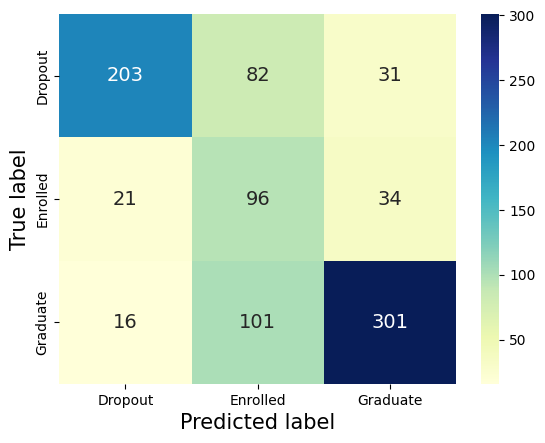

,Dropout,Enrolled,Graduate
Dropout,203,82,31
Enrolled,21,96,34
Graduate,16,101,301


In [58]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

In [59]:
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

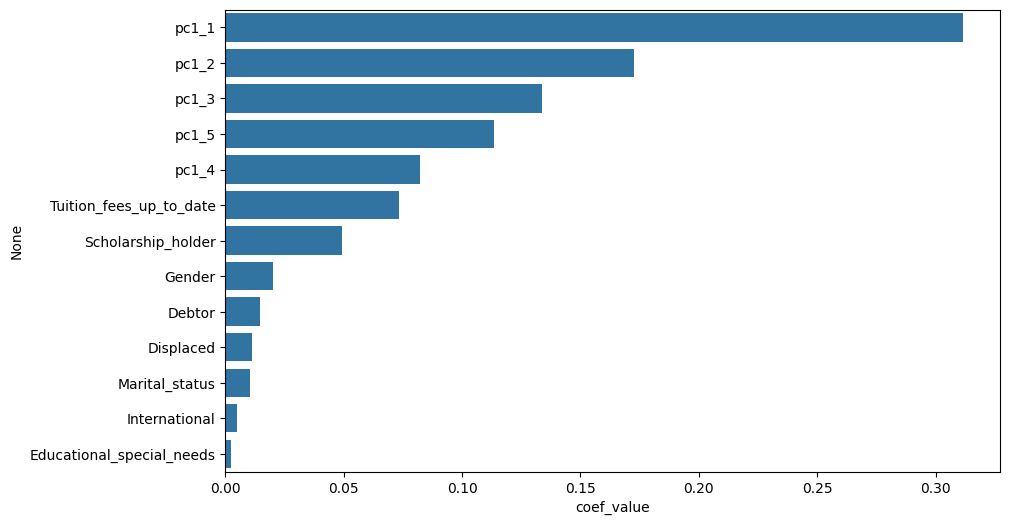

,coef_value
pc1_1,0.311683
pc1_2,0.172666
pc1_3,0.133852
pc1_5,0.113408
pc1_4,0.082279
Tuition_fees_up_to_date,0.073365
Scholarship_holder,0.049216
Gender,0.020007
Debtor,0.014654
Displaced,0.011129


In [60]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(rdf_model.feature_importances_, train_pca_df.columns)

In [61]:
!zip -r model.zip model
from google.colab import files
files.download("/content/model.zip")

  adding: model/ (stored 0%)
  adding: model/rdf_model.joblib (deflated 76%)
  adding: model/scaler_Curricular_units_1st_sem_without_evaluations.joblib (deflated 44%)
  adding: model/encoder_Marital_status.joblib (deflated 28%)
  adding: model/scaler_Curricular_units_1st_sem_grade.joblib (deflated 44%)
  adding: model/gboost_model.joblib (deflated 71%)
  adding: model/scaler_Curricular_units_1st_sem_evaluations.joblib (deflated 44%)
  adding: model/encoder_Debtor.joblib (deflated 28%)
  adding: model/scaler_Curricular_units_2nd_sem_without_evaluations.joblib (deflated 44%)
  adding: model/encoder_Educational_special_needs.joblib (deflated 28%)
  adding: model/encoder_International.joblib (deflated 28%)
  adding: model/encoder_Tuition_fees_up_to_date.joblib (deflated 28%)
  adding: model/scaler_Curricular_units_2nd_sem_approved.joblib (deflated 44%)
  adding: model/scaler_Curricular_units_1st_sem_enrolled.joblib (deflated 44%)
  adding: model/scaler_Curricular_units_1st_sem_credited.job

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>